In [22]:
import yfinance as yf
import pandas as pd
import finance_calculator as fc
import numpy as np
import pyfolio as pf
import empyrical as em
import datapackage as dp
import requests
import bs4 as bs
import hvplot.pandas


In [23]:

# 
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [24]:
tickers = []
date_first_added = []
for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        date = row.findAll('td')[6].text
        #fourth element is the sector
        
        
        tickers.append(ticker)
        date_first_added.append(date)

In [25]:

#We can get rid of the n at the of the ticker by using map, lambda and strip:
tickers = list(map(lambda s: s.strip(), tickers))

In [26]:
ticker_df = pd.DataFrame(tickers, columns=['ticker'])
date_first_added_df = pd.DataFrame(date_first_added, columns=['date first added'])

ticker_date_df = pd.concat([ticker_df, date_first_added_df], axis=1,)

#ticker_date_df.head()
date_first_added

['1976-08-09',
 '1964-03-31',
 '2012-12-31',
 '2018-05-31',
 '2011-07-06',
 '2015-08-31',
 '1997-05-05',
 '',
 '2015-07-09',
 '1998-10-02',
 '1999-05-28',
 '2000-06-05',
 '1985-04-30',
 '2007-07-12',
 '2016-05-13',
 '2016-07-01',
 '2017-03-20',
 '2017-06-19',
 '2013-12-02',
 '2016-07-01',
 '1995-07-13',
 '2014-04-03',
 '2006-04-03',
 '1957-03-04',
 '2005-11-18',
 '2019-06-07',
 '1991-09-19',
 '2015-03-23',
 '1957-03-04',
 '1976-06-30',
 '1980-03-31',
 '2007-11-19',
 '2016-03-04',
 '2005-10-03',
 '2001-08-30',
 '2013-09-23',
 '1992-01-02',
 '2008-09-30',
 '1999-10-12',
 '2017-06-19',
 '2002-07-25',
 '1996-04-23',
 '2017-07-26',
 '1997-07-28',
 '1982-11-30',
 '1995-03-16',
 '2012-12-24',
 '1981-07-29',
 '2018-08-28',
 '2016-05-31',
 '2007-04-10',
 '1983-11-30 (1957-03-04)',
 '2019-02-15',
 '1989-12-01',
 '1981-03-31',
 '1997-01-02',
 '2007-01-10',
 '1987-12-31',
 '2017-07-07',
 '1984-10-31',
 '1976-06-30',
 '1983-09-30',
 '1972-09-30',
 '1972-09-30',
 '2010-02-16',
 '1999-06-29',
 '2020-

In [27]:
#isolate comapanies with data dating back to at least Jan 1st 2018 using loc and conditional statement
random_stock_pool = ticker_date_df.loc[ticker_date_df['date first added'] < '2018-01-01']
random_stock_pool.reset_index(inplace=True)
random_stock_pool

,index,ticker,date first added
0,0,MMM,1976-08-09
1,1,ABT,1964-03-31
2,2,ABBV,2012-12-31
3,4,ACN,2011-07-06
4,5,ATVI,2015-08-31
...,...,...,...
430,499,XYL,2011-11-01
431,500,YUM,1997-10-06
432,502,ZBH,2001-08-07
433,503,ZION,2001-06-22


In [28]:

random_stock_pool_tickers = random_stock_pool['ticker']
random_stock_pool_tickers.count()

435

In [29]:
# Market Index Informations and pull their historical closing price since January 2018
start = "2018-01-01"
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start= start, actions=False)
sp500_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

In [30]:

#generate 10 random integers from 0 - 499 to serve as our randomly created portfolio
high = random_stock_pool_tickers.count()
index_numbers = np.random.randint(low=0, high=high, size=10)
print(index_numbers)

[ 10 215  28  73 312 281 259 102 414 403]


In [31]:
#isloate ticker symbols using loc function
random_portfolio_tickers = random_stock_pool_tickers.loc[index_numbers].reset_index()
random_portfolio_tickers

,index,ticker
0,10,A
1,215,ITW
2,28,AIG
3,73,CHRW
4,312,PKG
5,281,MDLZ
6,259,MTB
7,102,CME
8,414,DIS
9,403,VRSK


In [32]:

# pull data for 10 randomly genereated stocks 
random_stock_0 = yf.Ticker(random_portfolio_tickers["ticker"][0])
random_stock_1 = yf.Ticker(random_portfolio_tickers["ticker"][1])
random_stock_2 = yf.Ticker(random_portfolio_tickers["ticker"][2])
random_stock_3 = yf.Ticker(random_portfolio_tickers["ticker"][3])
random_stock_4 = yf.Ticker(random_portfolio_tickers["ticker"][4])
random_stock_5 = yf.Ticker(random_portfolio_tickers["ticker"][5])
random_stock_6 = yf.Ticker(random_portfolio_tickers["ticker"][6])
random_stock_7 = yf.Ticker(random_portfolio_tickers["ticker"][7])
random_stock_8 = yf.Ticker(random_portfolio_tickers["ticker"][8])
random_stock_9 = yf.Ticker(random_portfolio_tickers["ticker"][9])

random_stock_0_data = random_stock_0.history(start = start, actions =False)
random_stock_1_data = random_stock_1.history(start = start, actions =False)
random_stock_2_data = random_stock_2.history(start = start, actions =False)
random_stock_3_data = random_stock_3.history(start = start, actions =False)
random_stock_4_data = random_stock_4.history(start = start, actions =False)
random_stock_5_data = random_stock_5.history(start = start, actions =False)
random_stock_6_data = random_stock_6.history(start = start, actions =False)
random_stock_7_data = random_stock_7.history(start = start, actions =False)
random_stock_8_data = random_stock_8.history(start = start, actions =False)
random_stock_9_data = random_stock_9.history(start = start, actions =False)

random_stock_0_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_1_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_2_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_3_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_4_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_5_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_6_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_7_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_8_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_9_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

#Combine into single df
random_portfolio = pd.concat([random_stock_0_data, 
           random_stock_1_data, 
           random_stock_2_data, 
           random_stock_3_data, 
           random_stock_4_data, 
           random_stock_5_data, 
           random_stock_6_data, 
           random_stock_7_data, 
           random_stock_8_data, 
           random_stock_9_data], 
           axis="columns", join="inner").reset_index()

random_portfolio.set_index('Date', inplace=True)

In [33]:
daily_returns = random_portfolio.pct_change()
daily_returns

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,0.004175,0.011093,-0.002786,0.019173,0.004009,0.011216,0.016023,0.004293,-0.002922
2018-01-04,-0.007501,0.001145,0.003989,0.002570,0.016669,0.002349,0.001906,0.010672,-0.000445,0.005023
2018-01-05,0.015988,-0.000722,0.004139,-0.001672,0.003045,0.012886,-0.003575,0.006524,-0.005435,0.008851
2018-01-08,0.002146,0.009275,-0.006595,0.013509,0.008640,-0.005089,-0.002314,0.013899,-0.014334,0.001239
...,...,...,...,...,...,...,...,...,...,...
2021-09-28,-0.038947,-0.012375,-0.018236,-0.011259,-0.011140,-0.012948,-0.000661,-0.002721,-0.020981,-0.009768
2021-09-29,0.000625,0.002821,-0.002679,-0.002931,-0.004576,0.011997,0.012307,-0.008742,-0.010543,0.003123
2021-09-30,-0.015438,-0.031089,-0.017013,-0.016282,-0.027868,-0.014733,-0.023858,-0.014172,-0.020327,-0.010377


In [34]:
# calculate daily returns of portfolio assuming equal with (0.1) into each stock
weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

random_portfolio_returns = daily_returns.dot(weights)
random_portfolio_returns.head()

Date
2018-01-02         NaN
2018-01-03    0.008972
2018-01-04    0.003638
2018-01-05    0.004003
2018-01-08    0.002038
dtype: float64

In [35]:
# calucluate daily returnsd of S&P 500 then join with random portfolio returns

sp_daily_returns = sp500_data.pct_change()

sp_vs_random_returns = pd.concat([random_portfolio_returns, sp_daily_returns], axis="columns", join="inner")
sp_vs_random_return_columns = ["Random Portfolio","S&P 500"]
sp_vs_random_returns.columns=(sp_vs_random_return_columns)

<AxesSubplot:xlabel='Date'>

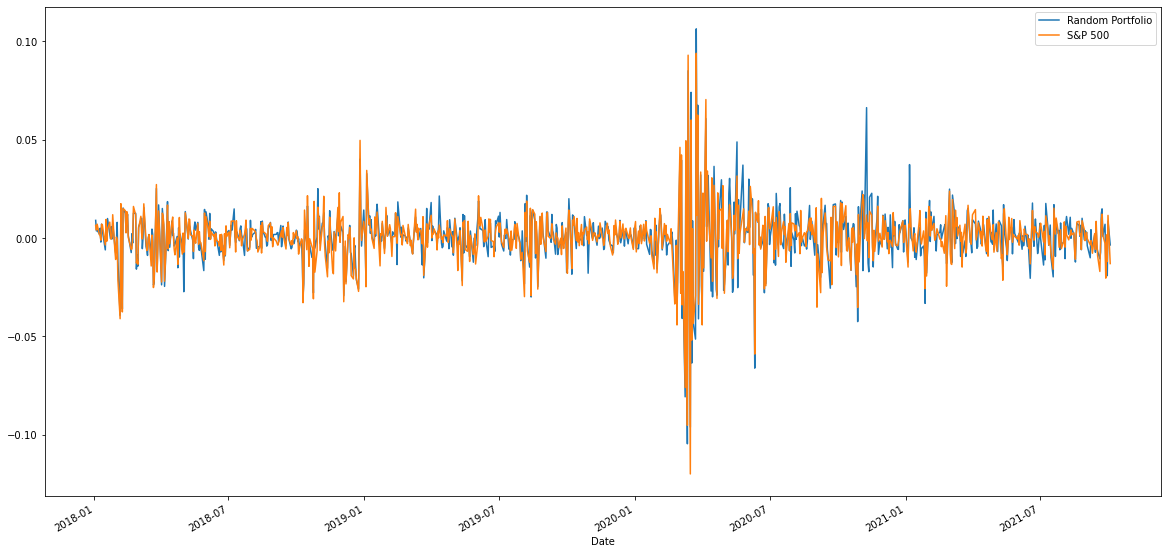

In [36]:
sp_vs_random_returns.plot(figsize = (20, 10))

In [37]:
growth_of_10k = 10000 * ((1+ sp_vs_random_returns).cumprod())

In [47]:
growth_of_10k.hvplot.line(title="Random Portfolio vs S&P500 Index - Who will outperform?", width = 1000, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [48]:

#determine if the random portfolio outperformed
growth_of_10k_reset = growth_of_10k.reset_index()
index_for_comparison = growth_of_10k_reset['S&P 500'].count()
current_value_random = growth_of_10k_reset["Random Portfolio"][index_for_comparison]
current_value_sp_500 = growth_of_10k_reset["S&P 500"][index_for_comparison]

In [49]:

current_value_sp_500

15952.384876777274

In [50]:
current_value_sp_500


15952.384876777274

In [51]:

if current_value_random > current_value_sp_500:
    print("the random portfolio outperformed the index!")
    
elif current_value_random == current_value_sp_500:
    print("the random portfolio performed the same as the index.")
        
elif current_value_random < current_value_sp_500:
     print("the random portfolio underperformed the index")

the random portfolio underperformed the index
